# Read PDF to TXT

Author lds217


# PDF to PNG

In [23]:
from pdf2image import convert_from_path

images = convert_from_path('data/a.pdf', poppler_path = r"D:\Dat\Github\OCR\bin\poppler-24.07.0\Library\bin")

for i in range(len(images)):
    images[i].save('data/converted/page'+ str(i) +'.jpg', 'JPEG')

# Clean PNG

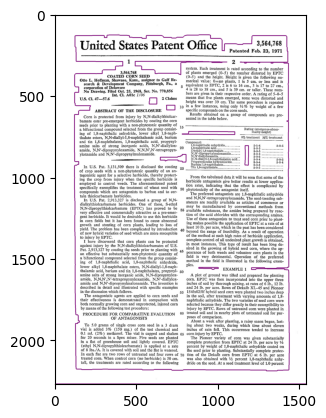

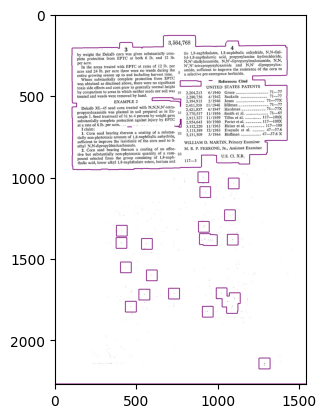

In [7]:
# Color drawings are acceptable in US patent applications, but not in international applications (see PCT Rule 11.13).
# https://github.com/pankajr141/experiments/blob/master/Reasoning/ComputerVision/opencv%20tricks%20-%20segmenting%20pdf%20contents.ipynb
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
a = 0
folder_path = 'data/converted'
for index, filename in enumerate(os.listdir(folder_path)):
    image_path = os.path.join(folder_path, filename)
    img = cv2.imread(image_path)

    img_ = 255 - img      # Reversing scales of RGB image
    img_[img_ < 128] = 0   # Removing pixel with low brightness


    # Remove Lines from our image
    kernel = np.ones((2, 2), np.uint8)
    img_erosion = cv2.erode(img_, kernel, iterations=1)

    # grouping Elements which are near
    kernel = np.ones((9, 9), np.uint8)
    img_dilation = cv2.dilate(img_erosion, kernel, iterations=8)

    gray = cv2.cvtColor(img_dilation, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    cv2.drawContours(img, contours, -1, (127, 12, 123), 3)
    cv2.imwrite('data/convertedprocess/page'+ str(a) +'.jpg', img)
    a+=1
    plt.figure()
    plt.imshow(img)


plt.show()

# Read text with tesseract

In [8]:
import os
from PIL import Image
import pytesseract

all_text = ""
folder_path = 'data/convertedprocess'
for filename in os.listdir(folder_path):
    image_path = os.path.join(folder_path, filename)
    text = pytesseract.image_to_string(Image.open(image_path))
    all_text += f"Text from {filename}:\n{text}\n\n"

output_file = 'output_tesseract_without_pre.txt'
with open(output_file, 'w', encoding='utf-8') as f:
    f.write(all_text)

# same result withou pre-processing


# Chat GPT

In [10]:
with open("output_tesseract.txt", "r", encoding='utf-8-sig') as f:
    string = f.read()
string

'Text from page0.jpg:\nUnited States Patent Office\n\n3,564,768\nPatented Feb. 23, 1971\n\ni\n\n3,564,768\nCOATED CORN SEED\nOtto L. Hoffman, Shawnee, Kans,, assignor to Gulf Re-\nsearch & Development Company, Pittsburgh, Pa., a\ncorporation of Delaware 5\nNo Drawing. Filed Oct. 25, 1968, Ser. No. 770,856\nInt. Cl. AOke 1/06 .\nUS. Cl. 47—57.6 2 Claims\n\n10\nABSTRACT OF THE DISCLOSURE\n\nCorn is protected from injury by N,N-dialkylthiolcar-\nbamate ester pre-emergent herbicides by coating the corn\nseeds prior to planting with a non-phytotoxic quantity of\na bifunctional compound selected from the group consist-\ning of 1,8-naphthalic anhydride, lower alkyl 1,8-naph-\nthalate esters, N,N-diallyl-1,8-naphthalamic acid, barium\nand tin 1,8-naphthalates, 1,8-naphthalic acid, propynyl-\namine salts of strong inorganic acids, N,N’-diallylox-\namide, N,N’-dipropynyloxamide, N,N,N’,N’-tetrapropyn-\nyloxamide and N,N’-dipropynylmalonamide.\n\n16\n\n20\n\nIn U.S. Pat. 3,131,509 there is disclo

In [11]:
from openai import OpenAI
import os

key = os.getenv("OPEN_AI_KEY")
client = OpenAI(
    api_key=key,
)

def chat_gpt(prompt):
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{"role": "user", "content": "can you help my summarize this document in technical term?" + prompt}]
    )
    return response.choices[0].message.content.strip()

print(chat_gpt(string))

The document describes a method for protecting corn plants from injury caused by N,N-dialkylthiolcarbamate ester pre-emergent herbicides by coating the corn seeds with a non-phytotoxic quantity of specific bifunctional compounds. The effectiveness of these compounds is demonstrated through a comparative evaluation test procedure. The preferred antagonists are 1,8-naphthalic anhydride and N,N,N’-tetrapropynyloxamide. Application of these compounds on corn seeds prior to planting allows for the safe use of EPTC herbicide at high rates, resulting in improved crop protection and yield. Examples are provided to illustrate the successful application of the method in the field. The document also includes patent information and references to relevant patents.


In [12]:
%pip install python-poppler

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [20 lines of output]
      + meson setup C:\Users\Owner\AppData\Local\Temp\pip-install-yniwaduw\python-poppler_bc740f02652c444682cfd5be404be4bf C:\Users\Owner\AppData\Local\Temp\pip-install-yniwaduw\python-poppler_bc740f02652c444682cfd5be404be4bf\.mesonpy-1061s34c -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\Owner\AppData\Local\Temp\pip-install-yniwaduw\python-poppler_bc740f02652c444682cfd5be404be4bf\.mesonpy-1061s34c\meson-python-native-file.ini
      The Meson build system
      Version: 1.5.2
      Source dir: C:\Users\Owner\AppData\Local\Temp\pip-install-yniwaduw\python-poppler_bc740f02652c444682cfd5be404be4bf
      Build dir: C:\Users\Owner\AppData\Local\Temp\pip-install-yniwaduw\python-poppler_bc740f02652c444682cfd5be404be4bf\.mesonpy-1061s34c
      Build type: native build
      Project name: python-poppler
      Proje

In [76]:
import deepdoctection as dd
from IPython.core.display import HTML
from matplotlib import pyplot as plt
import csv
import cv2
from pathlib import Path
from matplotlib import pyplot as plt
from IPython.core.display import HTML
from PIL import Image
import numpy as np
import pandas as pd

[0922 15:02.07 @doctectionpipe.py:84]  INF  Processing b_0.pdf
[0922 15:02.09 @context.py:133]  INF  ImageLayoutService total: 1.3018 sec.
[0922 15:02.09 @context.py:133]  INF  SubImageLayoutService total: 0.0 sec.
[0922 15:02.09 @context.py:133]  INF  SubImageLayoutService total: 0.0 sec.
[0922 15:02.09 @context.py:133]  INF  TableSegmentationService total: 0.0 sec.
[0922 15:02.09 @context.py:133]  INF  TableSegmentationRefinementService total: 0.0 sec.
[0922 15:02.11 @context.py:133]  INF  TextExtractionService total: 1.9871 sec.
[0922 15:02.11 @context.py:133]  INF  MatchingService total: 0.0029 sec.
[0922 15:02.11 @context.py:133]  INF  TextOrderService total: 0.0269 sec.
[0922 15:02.11 @doctectionpipe.py:84]  INF  Processing b_1.pdf
[0922 15:02.13 @context.py:133]  INF  ImageLayoutService total: 1.2448 sec.
[0922 15:02.13 @context.py:133]  INF  SubImageLayoutService total: 0.0 sec.
[0922 15:02.13 @context.py:133]  INF  SubImageLayoutService total: 0.0 sec.
[0922 15:02.13 @context.

IndexError: list index out of range

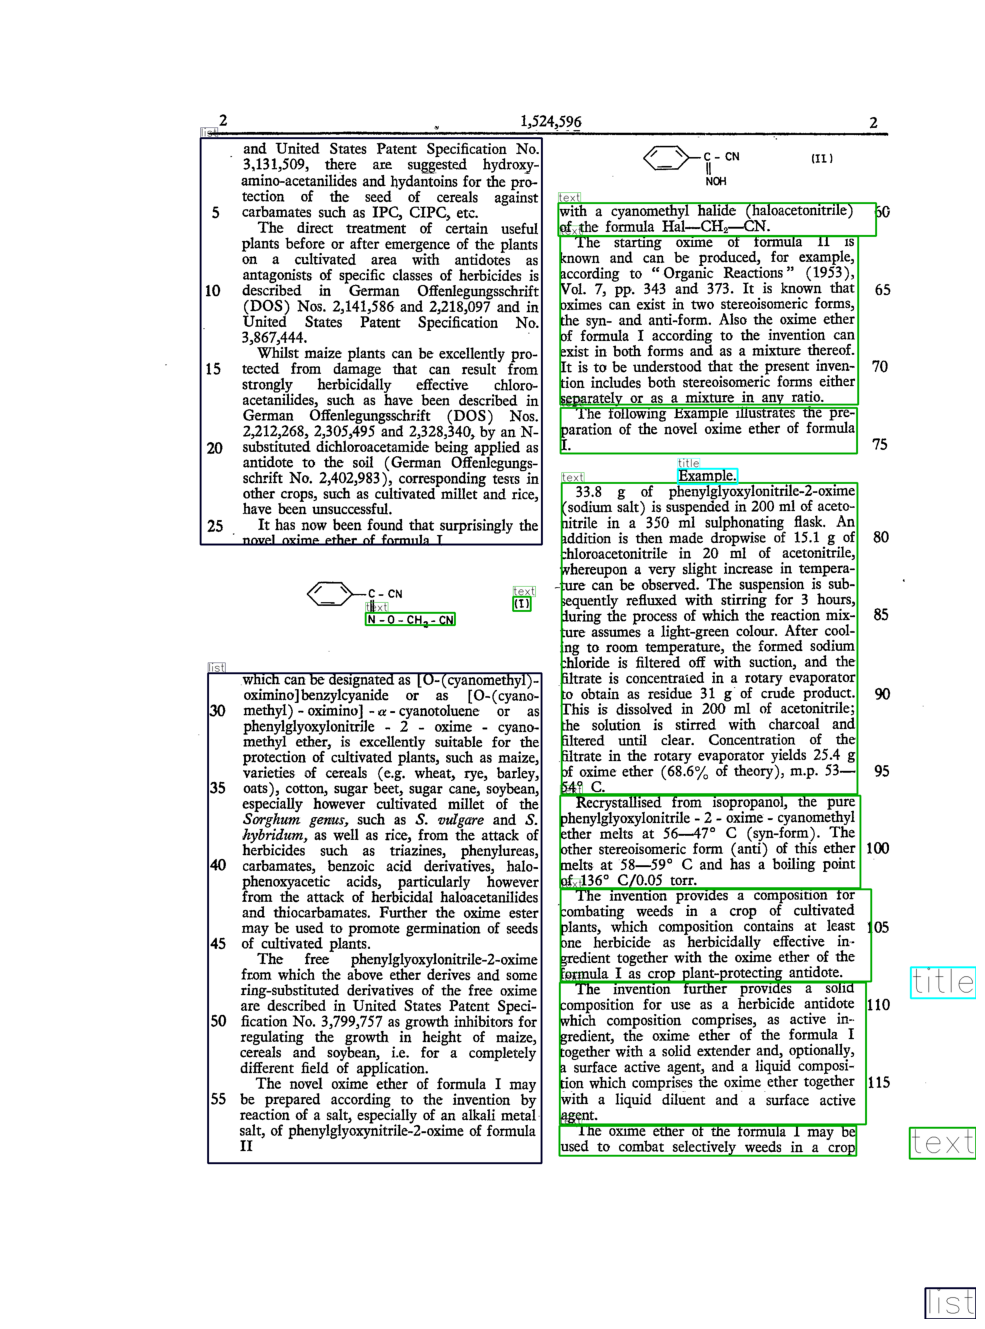

In [79]:
path ="data/b.pdf"
df = analyzer.analyze(path=path)
df.reset_state()
doc=iter(df)
page = next(doc)
page = next(doc)
image = page.viz()
plt.figure(figsize = (25,17))
plt.axis('off')
plt.imshow(image)

table = page.tables[0]
HTML(table.html)

In [5]:
from PyPDF2 import PdfReader  # Use PdfReader instead of PdfFileReader
import camelot

# Open the PDF using PdfReader
pdf_path = "data/c.pdf"
reader = PdfReader(pdf_path)

# Extract tables using Camelot
tables = camelot.read_pdf(pdf_path, pages="all")

# Process extracted tables
for table in tables:
    print(table.df)  # Print the dataframe of the extracted table

DeprecationError: PdfFileReader is deprecated and was removed in PyPDF2 3.0.0. Use PdfReader instead.

In [6]:
%pip install excalibur-py

INFO: pip is looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of flask to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 26.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 2.1/2.1 MB 58.8 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 0.7.10
    Uninstalling SQLAlchemy-0.7.10:
      Successfully uninstalled SQLAlchemy-0.7.10
Note: